 $Model$ $Development$ $on$ $churn$ $Dataset$ $By$ $Using$ $RandomForest$ $and$ $BoostingAlgorithm$ 

**Step-1: Import the packages**

In [1]:
import pandas as pd
data=pd.read_csv(r"C:\Users\Dell\OneDrive\Nareshit\DataScience&AI\ML Python\\churn_data.csv")
data

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


**Step-2: Check for missing values, if there are missing values fill with mode or median**

In [4]:
data.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [6]:
# Fill missing values with a specific value (e.g., 0 or 'Unknown')
data.fillna(0, inplace=True)  # For numerical columns
# or
data.fillna('Unknown', inplace=True)  # For categorical columns

In [14]:
# Drop non-numeric columns that are not useful for prediction (e.g., IDs, phone numbers)
data = data.drop(['phone_no'], axis=1)  # Replace with actual column names

In [16]:
data.isnull().sum()

year                      0
customer_id               0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [18]:
data

,year,customer_id,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,2015,998086,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,0,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,Male,40,94,no,no,178.05,10.4,20.18,100,6,0.0,3,0.0


**Step-3: Check if there are categorical columns covert to numerical columns**

In [36]:
data.dtypes

year                        int64
customer_id                 int64
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [38]:
# One-hot encoding categorical variables
data = pd.get_dummies(data, drop_first=True)

# Check if the data types are now numeric
print(data.dtypes)


year                        int64
customer_id                 int64
age                         int64
no_of_days_subscribed       int64
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
gender_Female                bool
gender_Male                  bool
multi_screen_yes             bool
mail_subscribed_yes          bool
dtype: object


In [42]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable 'churn' if it contains categorical strings
le = LabelEncoder()
data['churn'] = le.fit_transform(data['churn'])


**Step-4: Split the data into features and targets**

In [55]:
from sklearn.model_selection import train_test_split
X=data.drop('churn',axis=1)
y=data['churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1600, 15), (400, 15), (1600,), (400,))

**Step-5: Model Development**

$$RandomForest$$

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

**Step-6: Model Prediction**

In [62]:
y_pred=rf.predict(X_test)

In [64]:
X_test.shape,y_pred.shape,y_test.shape

((400, 15), (400,), (400,))

**Confusion Matrix**

In [69]:
from sklearn.metrics import confusion_matrix,precision_score,\
                             recall_score,f1_score,accuracy_score,\
                             roc_curve,auc,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [71]:
rf_cmt=confusion_matrix(y_test,y_pred)
rf_cmt

array([[338,  15],
       [ 21,  26]], dtype=int64)

<Axes: >

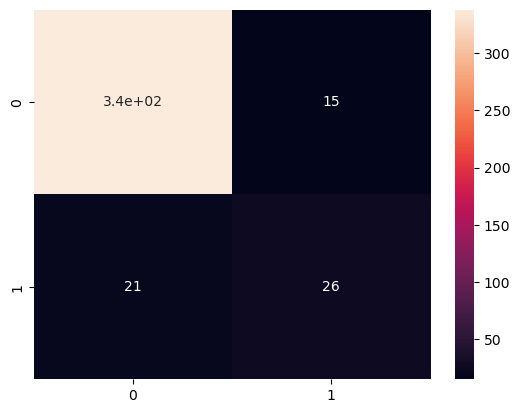

In [73]:
import seaborn as sns
sns.heatmap(rf_cmt,annot=True)

**ConfuionMatrixDisplay**

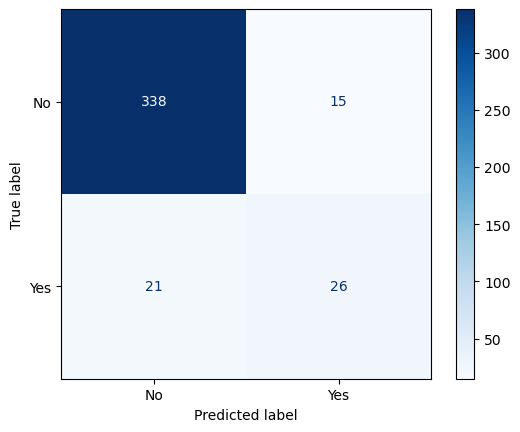

In [76]:
cmt=ConfusionMatrixDisplay(rf_cmt,display_labels=['No','Yes'])
cmt.plot(cmap="Blues")
plt.show()

In [97]:
rf_pr=round(precision_score (y_test,y_pred),2) 
rf_Re=round(recall_score (y_test,y_pred),2) 
rf_Ac=round(accuracy_score (y_test,y_pred), 2)
rf_F1=round(f1_score (y_test, y_pred), 2) 
print("precision is:",rf_pr) 
print("Recall is:",rf_Re) 
print("Accuracy is: ", rf_Ac) 
print("F1score is: ", rf_F1) 

precision is: 0.63
Recall is: 0.55
Accuracy is:  0.91
F1score is:  0.59


**Step-7: Save the model**

In [84]:
import pickle
pickle.dump(rf,
            open('churn_model.pkl','wb'))

**Step-8: Load the model**

In [87]:
model = pickle.load(open('churn_model.pkl','rb'))
model

RandomForestClassifier()

$$BoostingAlgorithm$$

In [123]:
from sklearn.model_selection import train_test_split
X=data.drop('churn',axis=1)
y=data['churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1600, 15), (400, 15), (1600,), (400,))

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
ba= GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
ba.fit(X_train, y_train)

GradientBoostingClassifier()

**Model prediction**

In [127]:
y_pred=ba.predict(X_test)

In [129]:
X_test.shape,y_pred.shape,y_test.shape

((400, 15), (400,), (400,))

**Confusion matrix**

In [131]:
from sklearn.metrics import confusion_matrix,precision_score,\
                             recall_score,f1_score,accuracy_score,\
                             roc_curve,auc,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [133]:
ba_cmt=confusion_matrix(y_test,y_pred)
ba_cmt

array([[338,  15],
       [ 22,  25]], dtype=int64)

<Axes: >

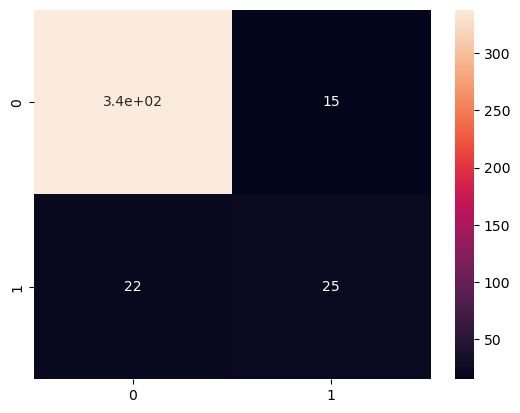

In [135]:
import seaborn as sns
sns.heatmap(ba_cmt,annot=True)

**ConfusionMatrixDisplay**

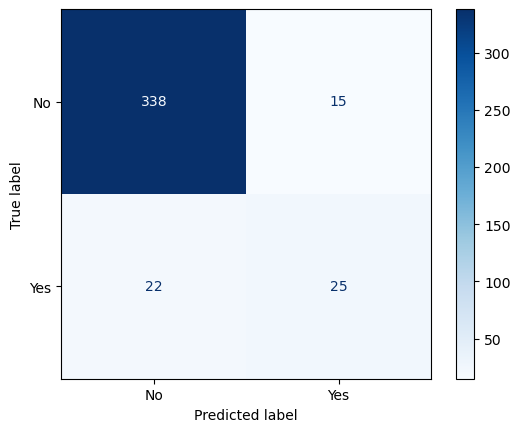

In [138]:
cmt=ConfusionMatrixDisplay(ba_cmt,display_labels=['No','Yes'])
cmt.plot(cmap="Blues")
plt.show()

In [140]:
ba_pr=round(precision_score (y_test,y_pred),2) 
ba_Re=round(recall_score (y_test,y_pred),2) 
ba_Ac=round(accuracy_score (y_test,y_pred), 2)
ba_F1=round(f1_score (y_test, y_pred), 2) 
print("precision is:",ba_pr) 
print("Recall is:",ba_Re) 
print("Accuracy is: ", ba_Ac) 
print("F1score is: ", ba_F1) 

precision is: 0.62
Recall is: 0.53
Accuracy is:  0.91
F1score is:  0.57


**Save the Model**

In [143]:
import pickle
pickle.dump(ba,
            open('churn_model.pkl','wb'))

**Load the model**

In [146]:
model = pickle.load(open('churn_model.pkl','rb'))
model

GradientBoostingClassifier()